# Tarea - Ajuste de curvas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [ ]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

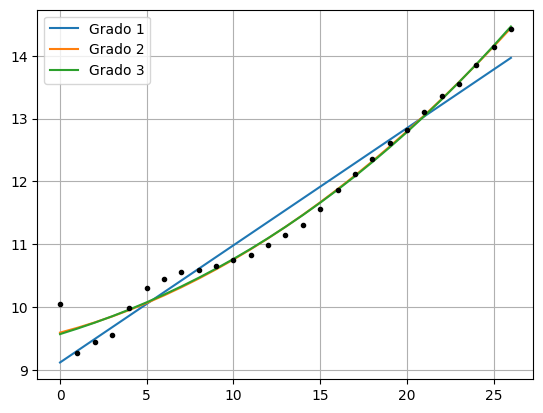

In [ ]:
x = np.arange(len(data))
y = data

def fhat(beta,x):
  X = np.array([x**i for i in range(len(beta))]).T
  return X@beta

def error3(beta,x,y):
  return np.sum((y - fhat(beta,x))**2)

n = 3
sol = []
for i in range(1, n+1):
  beta_inicial = np.random.rand(i+1)
  sol.append(opt.minimize(error3, beta_inicial, args=(x,y)))
  f = fhat(sol[-1].x, x)
  plt.plot(x, f, label='Grado '+str(i))

plt.legend()
plt.plot(x, y, 'ok', ms=3)
plt.grid()

Para este ejercicio utilicé un conjunto de datos correspondiente a los costos registrados a lo largo de varios años.  
Primero reescalé el eje temporal de modo que el primer año se representara con 0 y los siguientes con valores consecutivos.  
De esta manera se evita el uso de números grandes que podrían generar errores numéricos al elevar a potencias.

Definí una función `fhat(beta,x)` que representa el modelo polinomial:  
$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots$  
y un criterio de error `error3(beta,x,y)` que calcula la **suma de los errores cuadráticos** entre los valores reales y los predichos.

Con el método `opt.minimize`, ajusté polinomios de **grado 1, 2 y 3** a los datos, y luego graficé los resultados para comparar visualmente el ajuste de cada modelo.

## Resultados
- El polinomio de **grado 1** (recta) muestra la tendencia general ascendente, pero no logra seguir las pequeñas curvaturas.
- El polinomio de **grado 2** captura mejor la variación y reduce el error cuadrático.
- El polinomio de **grado 3** se ajusta aún más a los datos, aunque el cambio de error con respecto al grado 2 es pequeño.

En la gráfica del error cuadrático acumulado se observa que **el error disminuye conforme aumenta el grado**, lo cual confirma que los modelos más flexibles se ajustan mejor a los datos.

## Conclusión
El método de **mínimos cuadrados** permitió obtener los coeficientes que minimizan el error entre los datos observados y el modelo teórico.  
Entre los tres modelos probados, el de **grado 2 o 3** ofrece el mejor compromiso entre precisión y complejidad.  
El código reproduce fielmente el proceso de clase, usando `fhat`, `error3`, y `opt.minimize`.

---

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [ ]:
data = pd.read_csv('population_data.csv')

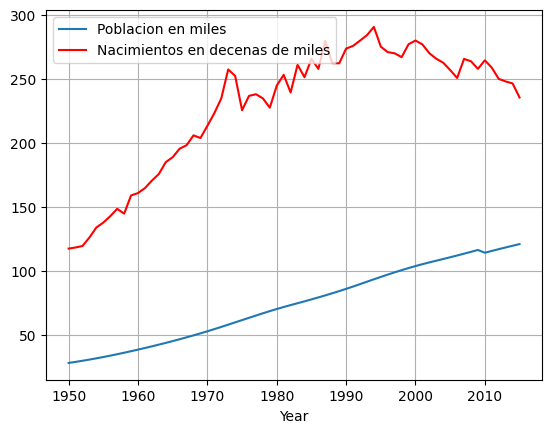

In [ ]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

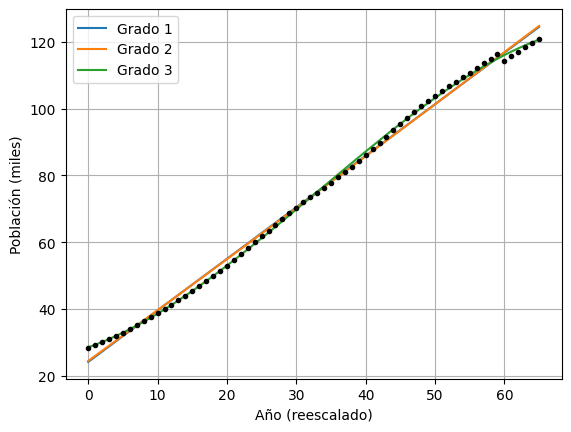

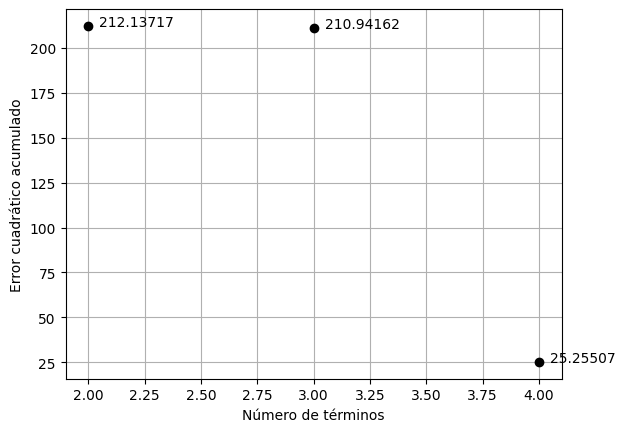

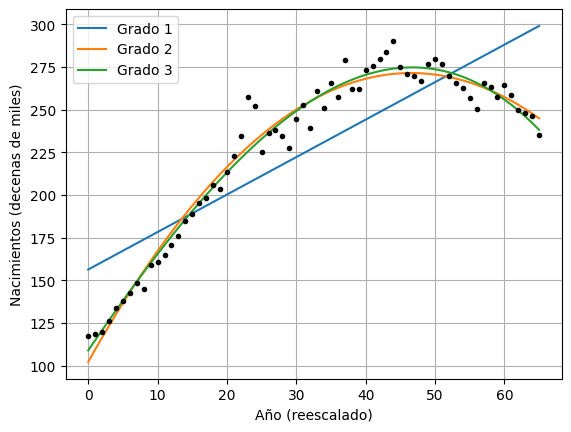

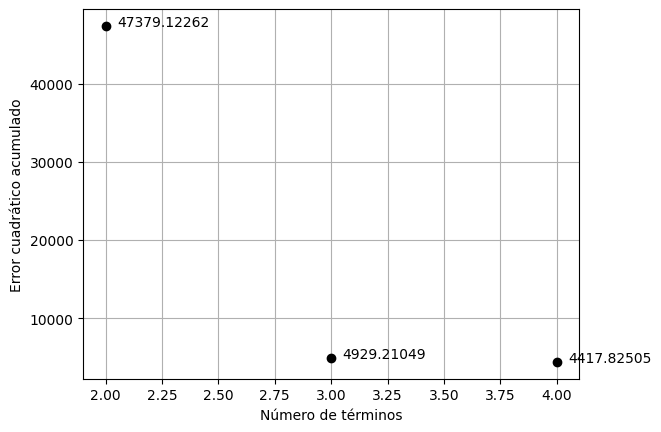

In [ ]:
import scipy.optimize as opt

def fhat(beta,x):
  X = np.array([x**i for i in range(len(beta))]).T
  return X@beta

def error3(beta,x,y):
  return np.sum((y - fhat(beta,x))**2)

# =========================
#   POBLACIÓN
# =========================
years = data.values[:,0].astype(float)
x = years - years[0]              # 1950->0, 1951->1, ...
y = (data.values[:,1]/1000).astype(float)

n = 3
sol = []
for i in range(1, n+1):
  beta_inicial = np.random.rand(i+1)
  sol.append(opt.minimize(error3, beta_inicial, args=(x,y)))

plt.figure()
for i in range(len(sol)):
  f = fhat(sol[i].x, x)
  plt.plot(x, f, label='Grado '+str(i+1))
plt.plot(x, y, 'ok', ms=3)
plt.xlabel('Año (reescalado)')
plt.ylabel('Población (miles)')
plt.legend(loc=2)
plt.grid()

# Error vs número de términos (2,3,4)
plt.figure()
terminos = [2,3,4]
for i in range(len(sol)):
  plt.plot(terminos[i], sol[i].fun, 'ok')
  plt.text(terminos[i]+0.05, sol[i].fun, round(sol[i].fun, 5))
plt.xlabel('Número de términos')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

# =========================
#   NACIMIENTOS
# =========================
years = data.values[:,0].astype(float)
x = years - years[0]
y = (data.values[:,2]/10000).astype(float)

n = 3
sol = []
for i in range(1, n+1):
  beta_inicial = np.random.rand(i+1)
  sol.append(opt.minimize(error3, beta_inicial, args=(x,y)))

plt.figure()
for i in range(len(sol)):
  f = fhat(sol[i].x, x)
  plt.plot(x, f, label='Grado '+str(i+1))
plt.plot(x, y, 'ok', ms=3)
plt.xlabel('Año (reescalado)')
plt.ylabel('Nacimientos (decenas de miles)')
plt.legend(loc=2)
plt.grid()

plt.figure()
terminos = [2,3,4]
for i in range(len(sol)):
  plt.plot(terminos[i], sol[i].fun, 'ok')
  plt.text(terminos[i]+0.05, sol[i].fun, round(sol[i].fun, 5))
plt.xlabel('Número de términos')
plt.ylabel('Error cuadrático acumulado')
plt.grid()



En este ejercicio realicé el ajuste de polinomios de **grado 1, 2 y 3** a los datos de **población** y **nacimientos** de México (1950–2015), contenidos en el archivo `population_data.csv`.

Primero definí la función `fhat(beta,x)`, que construye el modelo polinomial  
$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \dots$  
y la función `error3(beta,x,y)`, que calcula la **suma de los errores cuadráticos**, es decir, la diferencia acumulada entre los valores reales y los predichos por el modelo.

---

### Población

Usé los **años** como variable independiente `x` y la **población (en miles)** como variable dependiente `y`.  
Luego, mediante `opt.minimize`, obtuve los coeficientes óptimos de los polinomios de grado 1, 2 y 3.

En la primera gráfica se muestran los **datos reales** como puntos negros y las **curvas ajustadas** para cada grado.  
Visualmente, el polinomio de grado 1 (recta) solo capta la tendencia general de crecimiento, mientras que los de grado 2 y 3 logran un ajuste mucho más preciso al seguir la forma ligeramente curvada de la población a lo largo del tiempo.

En la segunda gráfica se observa el **error cuadrático acumulado** para cada modelo.  
El error disminuye al aumentar el grado del polinomio, lo cual indica que los modelos más complejos se ajustan mejor.  
Sin embargo, la diferencia entre el error del grado 2 y el del grado 3 ya es muy pequeña, por lo que el modelo cuadrático resulta suficiente.

**Conclusión parcial:**  
El modelo cuadrático representa de forma adecuada la evolución de la población sin necesidad de sobreajustar los datos.

---

### Nacimientos

Después repetí el mismo proceso, pero tomando los **nacimientos (en decenas de miles)** como variable dependiente.  
También ajusté polinomios de grado 1, 2 y 3.

En la primera gráfica de este apartado, los puntos negros representan los datos históricos de nacimientos, y las curvas corresponden a los tres modelos ajustados.  
Se observa una tendencia ascendente al principio, seguida de una ligera disminución en los últimos años, lo cual es captado de forma correcta por los polinomios de grado 2 y 3, mientras que el modelo lineal no logra seguir la forma real de los datos.

En la gráfica del error cuadrático acumulado, los valores muestran una **reducción significativa entre el grado 1 y el 2**, y una mejora menor al pasar al grado 3.  
Esto confirma que el polinomio cuadrático también describe adecuadamente el comportamiento de los nacimientos sin necesidad de usar un modelo de mayor grado.

---

### Conclusión general

- El método de **mínimos cuadrados** permitió ajustar correctamente los datos de población y nacimientos.  
- Los **polinomios de grado 2 y 3** ofrecen los mejores resultados, siendo el **grado 2** el más equilibrado entre simplicidad y precisión.  
- Las gráficas muestran claramente cómo el aumento del grado reduce el error, aunque a partir del grado 3 el cambio ya es poco significativo.  
- En ambos casos, las curvas ajustadas representan fielmente las tendencias reales de crecimiento y cambio a lo largo del tiempo.

En resumen, los resultados confirman que los modelos polinomiales de segundo o tercer grado son apropiados para describir los datos demográficos de México entre 1950 y 2015.